In [15]:
library(vegan)
library(readxl)
library(ggplot2)
library(tibble)
library(gclus)
library(repr)

In [17]:
ordicenter <- function (ord, groups, display = "sites", w = weights(ord, display), 
            show.groups, ...) 
  {
    weights.default <- function(object, ...) NULL
    pts <- scores(ord, display = display, ...)
    w <- eval(w)
    if (length(w) == 1) 
      w <- rep(1, nrow(pts))
    if (is.null(w)) 
      w <- rep(1, nrow(pts))
    if (!missing(show.groups)) 
    {
      take <- groups %in% show.groups
      pts <- pts[take, , drop = FALSE]
      groups <- groups[take]
      w <- w[take]
    }
    out <- seq(along = groups)
    inds <- names(table(groups))
    for (is in inds) 
    {
      gr <- out[groups == is]
      if (length(gr) > 1)
      {
        X <- pts[gr, ]
        W <- w[gr]
        ave <- apply(X, 2, weighted.mean, w = W)
        vegan:::ordiArgAbsorber(ave[1], ave[2], labels = is, FUN = text, ...)
      }
      if (length(gr) == 1)
      {
        X <- pts[gr, ]
        W <- w[gr]
        vegan:::ordiArgAbsorber(X[1], X[2], labels = is, FUN = text, ...)
      }
    }
    invisible()
  }

In [19]:
#dataset = read_excel("C:/Users/edo13/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", range = cell_rows(4:328))
dataset = read_excel("C:/Users/edoardo.marchi/Dropbox/microbiome/SoilHealth-Fungi_mod.xlsx", range = cell_rows(4:328))

New names:
• `Arachnomyces` -> `Arachnomyces...77`
• `f__Gymnoascaceae` -> `f__Gymnoascaceae...81`
• `c__Eurotiomycetes` -> `c__Eurotiomycetes...87`
• `Ascobolus` -> `Ascobolus...100`
• `f__Pezizaceae` -> `f__Pezizaceae...103`
• `f__Pyronemataceae` -> `f__Pyronemataceae...108`
• `o__Hypocreales` -> `o__Hypocreales...146`
• `o__Sordariales` -> `o__Sordariales...153`
• `Filobasidium` -> `Filobasidium...219`
• `Arachnomyces` -> `Arachnomyces...258`
• `Ascobolus` -> `Ascobolus...259`
• `Filobasidium` -> `Filobasidium...274`
• `f__Gymnoascaceae` -> `f__Gymnoascaceae...311`
• `c__Eurotiomycetes` -> `c__Eurotiomycetes...312`
• `f__Pezizaceae` -> `f__Pezizaceae...313`
• `f__Pyronemataceae` -> `f__Pyronemataceae...314`
• `o__Hypocreales` -> `o__Hypocreales...315`
• `o__Sordariales` -> `o__Sordariales...318`
• `` -> `...326`


In [21]:
#data = dataset[, c(1:1, 3:3, 6:6, 15:16, 20:20, 24:24)]
data = dataset[, c(1:13, 15:24)]

In [23]:
### SELECT ONLY ONE SITE

#data = data[data$SITE == "S", ]

In [25]:
# defining explanatory variables and phyla data
# prepare dataframes for analysis

abiotic = data[, c(1:1, 3:3, 6:13)]
#abiotic = data[, c(7:13)]

df_phyla <- data[, c(14:23)]
df_phyla <- as.data.frame(df_phyla)

abiotic <- as.data.frame(abiotic)

data <- as.data.frame(data)

df_phyla[is.na(df_phyla)] <- 0
data[is.na(data)] <- 0
abiotic[is.na(abiotic)] <- 0

abiotic <- abiotic[rowSums(df_phyla != 0) > 0, ]
data <- data[rowSums(df_phyla != 0) > 0, ]
df_phyla <- df_phyla[rowSums(df_phyla != 0) > 0, ]

#abiotic_standard <- as.data.frame(scale(abiotic))

# PCA 


Call:
rda(X = df_phyla) 

Partitioning of variance:
              Inertia Proportion
Total            1170          1
Unconstrained    1170          1

Eigenvalues, and their contribution to the variance 

Importance of components:
                           PC1      PC2      PC3      PC4      PC5     PC6
Eigenvalue            691.0724 259.0981 120.0576 50.03848 23.61732 13.5788
Proportion Explained    0.5905   0.2214   0.1026  0.04276  0.02018  0.0116
Cumulative Proportion   0.5905   0.8119   0.9145  0.95725  0.97743  0.9890
                          PC7       PC8       PC9
Eigenvalue            12.5189 0.2591901 5.374e-02
Proportion Explained   0.0107 0.0002215 4.592e-05
Cumulative Proportion  0.9997 0.9999541 1.000e+00


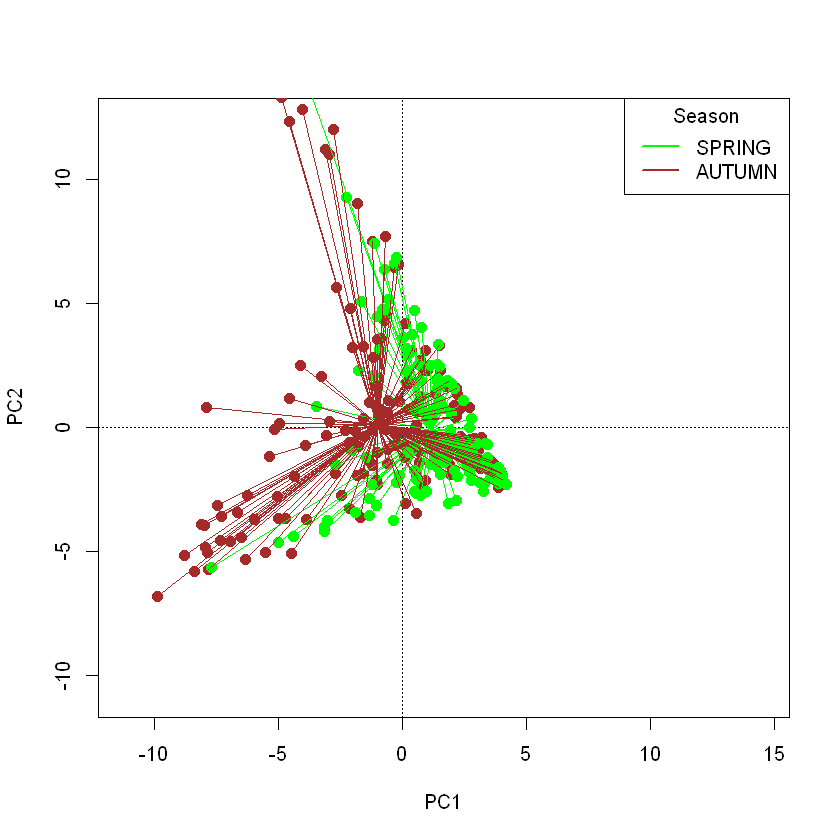

In [51]:
# Set the output file to a PDF
#pdf("pca.pdf")

mypca <- rda(df_phyla)

# Summarize the RDA result
summary(mypca)

# Plot the RDA result

ordiplot(mypca, display = c("sites", "species"), type = "none")
# Add sites with colors based on groups
points(scores(myrda, display = "sites"), col = group_colors, pch = 16, cex = 1.2)

groups <- data$Season

ordispider(myrda, groups, display = "sites", col = c("green", "brown"))
# Add a legend
legend("topright", legend = c("SPRING", "AUTUMN"), col =  c("green", "brown"), lwd = 2, title = "Season")




# RDA - abiotics as explanatory variables


Call:
rda(formula = df_phyla ~ SITE + TREAT + Season + S.M + OM + `EC-(ds/m)` +      pH + `TN-(%)` + `OC-(%)` + `C:N`, data = abiotic) 

Partitioning of variance:
              Inertia Proportion
Total          1170.3     1.0000
Constrained     214.0     0.1829
Unconstrained   956.3     0.8171

Eigenvalues, and their contribution to the variance 

Importance of components:
                          RDA1     RDA2     RDA3     RDA4     RDA5      RDA6
Eigenvalue            144.9859 43.97767 18.07296 4.810625 1.701727 0.3715238
Proportion Explained    0.1239  0.03758  0.01544 0.004111 0.001454 0.0003175
Cumulative Proportion   0.1239  0.16147  0.17691 0.181020 0.182475 0.1827920
                           RDA7      RDA8      RDA9      PC1      PC2      PC3
Eigenvalue            8.597e-02 3.287e-03 1.136e-03 551.2025 217.1505 98.86634
Proportion Explained  7.346e-05 2.809e-06 9.706e-07   0.4710   0.1856  0.08448
Cumulative Proportion 1.829e-01 1.829e-01 1.829e-01   0.6539   0.8394  0.92390

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
SITE,1,13.370016,3.8588178,0.016
TREAT,2,63.245084,9.1268127,0.001
Season,1,86.204008,24.8799680,0.001
S.M,1,20.511613,5.9200064,0.001
OM,1,7.709903,2.2252115,0.089
`EC-(ds/m)`,1,3.701730,1.0683833,0.342
pH,1,4.187200,1.2084984,0.279
`TN-(%)`,1,6.529559,1.8845436,0.137
`OC-(%)`,1,5.220867,1.5068324,0.200


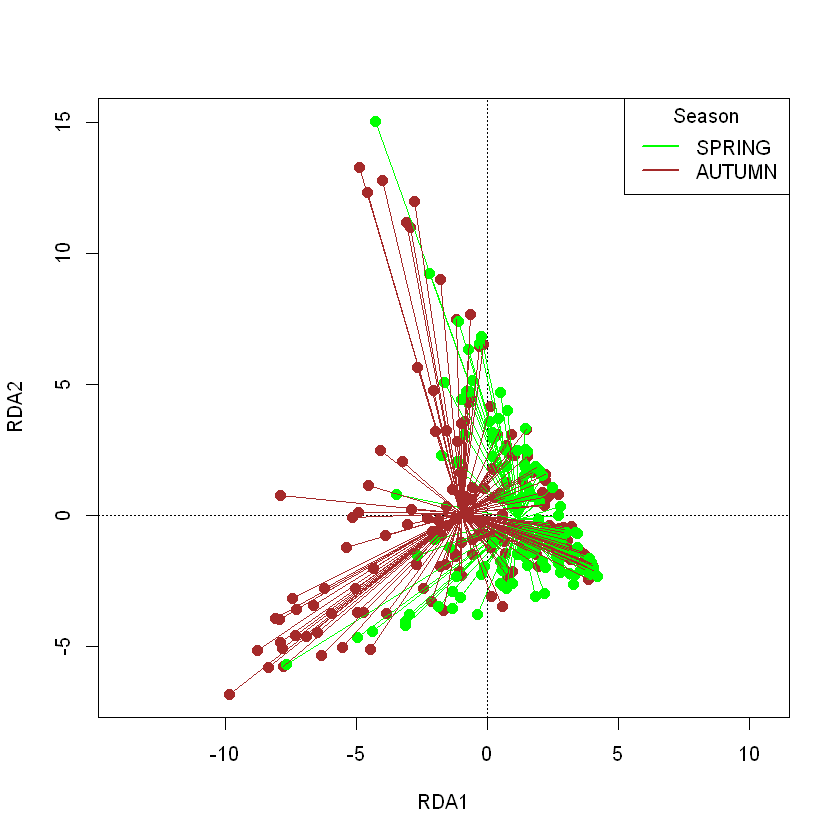

In [43]:
# Set the output file to a PDF
#pdf("rda_abiotics_TREAT_SITE.pdf")

myrda <- rda(df_phyla ~ .,
             data = abiotic)
# Summarize the RDA result
summary(myrda)

# Plot the RDA result

ordiplot(myrda, display = c("species", "sites"), type = "none", choices = c(1, 2))

envfit_result <- envfit(myrda, abiotic, perm = 999)

# Define groups (e.g., based on Management)
groups <- as.factor(data$Season)

# Define colors for groups
group_colors <- c("green", "brown")  # One color per group
group_colors <- group_colors[as.numeric(groups)]  # Match group to color

# Add sites with colors based on groups
points(scores(myrda, display = "sites"), col = group_colors, pch = 16, cex = 1.2)

ordispider(myrda, groups, display = "sites", col = c("green", "brown"))

# Add a legend
legend("topright", legend = c("SPRING", "AUTUMN"), col =  c("green", "brown"), lwd = 2, title = "Season")

anova(myrda, by = "term")

In [104]:
# Forward selection of variables:
fwd.sel <- ordiR2step(rda(df_phyla ~ 1, data = abiotic), # lower model limit (simple!)
               scope = formula(myrda), # upper model limit (the "full" model)
               direction = "forward",
               R2scope = TRUE, # can't surpass the "full" model's R2
               pstep = 1000,
               trace = FALSE) # change to TRUE to see the selection process!

In [ ]:
fwd.sel$call

In [ ]:
# Write our new model
myrda.signif <- rda(df_phyla ~ OM, data = abiotic)

In [106]:
anova.cca(myrda.signif, step = 1000, by = "term")

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
OM,1,14.22758,4.040232,0.019
Residual,286,1007.14182,NA,NA


# PCoA

In [165]:
phyla_dist <- dist(df_phyla, method = "euclidean")
phyla_pco <- cmdscale(phyla_dist, eig = TRUE, k = 3)
eig_num <- seq(1, length(phyla_pco$eig), 1)
#barplot(phyla_pco$eig[1:20], names.arg = eig_num[1:20], main = "PCO eigenvalue Scree plot")

In [197]:
pdf("pcoa_phyla.pdf")

ordiplot(phyla_pco,
         choices = c(1, 2),
         display='sites',
         type ='none',
         main = "PCoA Ordination",
         xlab = "PCoA 1",
         ylab = "PCoA 2",
         cex.main = 2,
         cex.axis = 1.5,
         cex.lab = 1.5)

#plot(NA, xlim = c(-50, 50), ylim = c(-8, 10.5), xlab = "PCoA 1", ylab = "PCoA 2", main = "PCoA Ordination")

# Define groups (e.g., based on Management)
groups <- as.factor(data$Season)

# Define colors for groups
group_colors <- c("springgreen2", "brown")  # One color per group
group_colors <- group_colors[as.numeric(groups)]  # Match group to color

# Add sites with colors based on groups
points(scores(phyla_pco, display = "sites"), col = group_colors, pch = 16, cex = 1.2)

ordispider(phyla_pco, groups, display = "sites", 
           col = c("springgreen2", "brown"))

# Add a legend
legend("bottomright", legend = c("SPRING", "AUTUMN"), col =  c("springgreen2", "brown"), lwd = 2, title = "Season", cex = 1.5)

dev.off()



pdf 
  2

# CCA 

In [199]:
# Set the output file to a PDF
pdf("cca_phyla.pdf")

mycca <- cca(df_phyla ~ .,
             data = abiotic)
# Summarize the RDA result
summary(mycca)

# Plot the RDA result

plot(NA, xlim = c(-7, 5), ylim = c(-8, 10.5), xlab = "CCA 1", ylab = "CCA 2", main = "CCA Ordination", cex.lab = 1.5, cex.axis = 1.5, cex.main = 2 )

#ordiplot(mycca, display = c("species", "sites"), type = "points", choices = c(1, 2))

envfit_result <- envfit(mycca, abiotic, perm = 999)

# Define groups (e.g., based on Management)
groups <- as.factor(abiotic$Season)

# Define colors for groups
group_colors <- c("springgreen2", "brown")  # One color per group
group_colors <- group_colors[as.numeric(groups)]  # Match group to color

# Add sites with colors based on groups
points(scores(mycca, display = "sites"), col = group_colors, pch = 16, cex = 1.2)

ordispider(mycca, groups, display = "sites", col = c("springgreen2", "brown"))

#ordihull(scores(myrda, display = "sites"), groups, col = c("red", "blue"), lwd = 2)

#plot(envfit_result, col = "darkgreen")

# Add a legend
legend("topright", legend = c("SPRING", "AUTUMN"), col =  c("springgreen2", "brown"), lwd = 2, title = "Season", cex = 1.5)

anova(mycca, by = "term")

dev.off()


Call:
cca(formula = df_phyla ~ SITE + TREAT + Season + S.M + OM + `EC-(ds/m)` +      pH + `TN-(%)` + `OC-(%)` + `C:N`, data = abiotic) 

Partitioning of scaled Chi-square:
              Inertia Proportion
Total          1.3365     1.0000
Constrained    0.1941     0.1453
Unconstrained  1.1423     0.8547

Eigenvalues, and their contribution to the scaled Chi-square 

Importance of components:
                         CCA1    CCA2    CCA3    CCA4     CCA5     CCA6
Eigenvalue            0.07565 0.05242 0.03471 0.02053 0.006575 0.002617
Proportion Explained  0.05660 0.03922 0.02597 0.01536 0.004920 0.001958
Cumulative Proportion 0.05660 0.09583 0.12180 0.13716 0.142079 0.144037
                           CCA7      CCA8      CCA9    CA1    CA2    CA3    CA4
Eigenvalue            0.0006975 0.0004797 0.0004612 0.2492 0.2172 0.1600 0.1412
Proportion Explained  0.0005219 0.0003590 0.0003451 0.1864 0.1625 0.1197 0.1057
Cumulative Proportion 0.1445586 0.1449176 0.1452627 0.3317 0.4942 0.6139 0.71

,Df,ChiSquare,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
SITE,1,0.017155640,4.145047,0.001
TREAT,2,0.079177770,9.565238,0.001
Season,1,0.036861020,8.906148,0.001
S.M,1,0.010995308,2.656623,0.024
OM,1,0.004882383,1.179653,0.299
`EC-(ds/m)`,1,0.004578469,1.106223,0.354
pH,1,0.023189840,5.602996,0.002
`TN-(%)`,1,0.005336992,1.289493,0.259
`OC-(%)`,1,0.004921376,1.189075,0.299


pdf 
  2